# Searching by image using Imago-OCR and RDKit
Steps:
1. Load image from disk.
2. Create .mol file using Imago OCR
3. Save .mol file to disk.
4. 
   - Load .mol file from disk using RDKit.
   - Create mol object using RDKit.
5. Perform (sub)substructure search using RDKit on exisint/loaded SMILES.
6. Display 2-D structures of results using RDKit.

In [1]:
import rdkit as rd
import rdkit.Chem as chem
import imagopy as ocr
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

%matplotlib inline

The correct Imago OCR API functions calling order is:

`imagoAllocSessionId()
imagoSetSessionId(id)
imagoLoadImageFromFile() / imagoLoadImageFromBuffer / imagoLoadGreyscaleRawImage
imagoSetFilter() [optional]
imagoFilterImage()
    imagoSetConfig() [optional]
    imagoRecognize()
    imagoSaveMolToFile() / imagoSaveMolToBuffer()
imagoReleaseSessionId(id)`

In [2]:
x = ocr.imagoAllocSessionId()
ocr.imagoSetSessionId(x)

**Step 1: Load image from disk.**

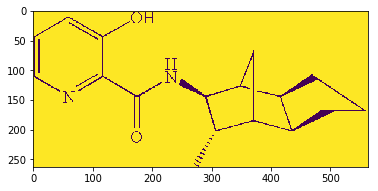

In [3]:
img = mpimg.imread('imago_test.png')
imgplot = plt.imshow(img)

In [4]:
ocr.imagoLoadImageFromFile('imago_test.png')

1

**Step 2: Create .mol file using Imago OCR**

In [6]:
ocr.imagoRecognize()

(1, 0)

**Step 3: Save mol file to disk**

In [7]:
ocr.imagoSaveMolToFile('imago_test.mol')

1

**Step 4: Load .mol file from disk using RDKit.**

In [8]:
mol = chem.MolFromMolFile('imago_test.mol')

In [9]:
from rdkit.Chem import Draw

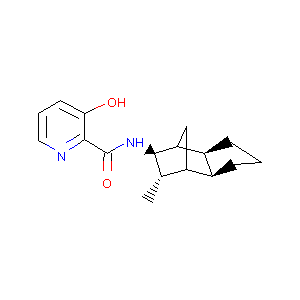

In [10]:
Draw.MolToImage(mol)

In [ ]:
# mol.GetSubstructMatch(mol,dicarbonyl)

In [11]:
chem.MolToSmiles(mol)

'CC1C2CC(C3CCCC23)C1NC(=O)c1ncccc1O'